<h1>Creating simple dataset</h1>

In [1]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(42)
data = {
    "Area (sqft)": np.random.randint(1000, 4000, 100),
    "Bedrooms": np.random.randint(1, 5, 100),
    "Age of House": np.random.randint(1, 30, 100),
    "Price": np.random.randint(50000, 500000, 100)
}

df = pd.DataFrame(data)
df.to_csv("../data/house_prices.csv", index=False)

<h1>Load Data Set</h1>

In [2]:
df = pd.read_csv("../data/house_prices.csv")
#
#checking for the null value
df.isnull().sum()

#get the discription 
df.describe()

,Area (sqft),Bedrooms,Age of House,Price
count,100.000000,100.000000,100.000000,100.000000
mean,2518.550000,2.620000,14.470000,272485.980000
std,855.173671,1.089713,9.072608,129276.577411
min,1021.000000,1.000000,1.000000,52869.000000
25%,1809.000000,2.000000,6.000000,168789.750000
50%,2434.000000,3.000000,16.000000,255488.500000
75%,3273.000000,3.250000,23.000000,383900.500000
max,3945.000000,4.000000,29.000000,494623.000000


<h3>Data Processing</h3>
<ul>
    <li>Handel missing data</li>
    <li>convert categorical data to Numerical</li>
    <li>Feature selection</li>
</ul>

In [3]:
df = df.dropna()#drop all the missing values

#features to train the model
X = df[['Area (sqft)', 'Bedrooms', 'Age of House']]
y = df['Price']



In [4]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")





Mean Squared Error: 19200954026.039692
R² Score: -0.10907863046786082


In [5]:
new_house = [[2500, 3, 10]]  # Area: 2500 sqft, Bedrooms: 3, House Age: 10 years
predicted_price = model.predict(new_house)
print(f"Predicted House Price: {predicted_price[0]}")


Predicted House Price: 263202.52703465323


c:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
import joblib

# Save model
joblib.dump(model, "house_price_model.pkl")

# Load model
loaded_model = joblib.load("house_price_model.pkl")

# Predict using the loaded model
print(loaded_model.predict(new_house))


[263202.52703465]


c:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


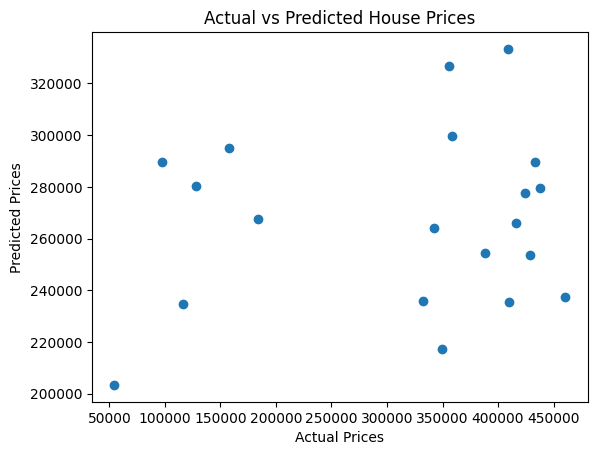

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

